<a href="https://colab.research.google.com/github/joeyeuron/Case-Study-CE880/blob/main/Penultimate_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [32]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# Data Exploration and Preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.xlsx to loan_data (1).xlsx


### Load dataset using pandas

In [3]:
excel_file = pd.ExcelFile('loan_data.xlsx')
df = excel_file.parse(excel_file.sheet_names[0])

###Perform Exploratory Data Analysis (EDA)

In [4]:
# Print the first few rows of the dataset to get an initial idea of the data
print(df.head())

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0      Graduate            No            584900   
1   Male     Yes          1      Graduate            No            458300   
2   Male     Yes          0      Graduate           Yes            300000   
3   Male     Yes          0  Not Graduate            No            258300   
4   Male      No          0      Graduate            No            600000   

   Coapplicant_Income  Loan_Amount   Term  Credit_History   Area Status  
0                 0.0     15000000  360.0             1.0  Urban      Y  
1            150800.0     12800000  360.0             1.0  Rural      N  
2                 0.0      6600000  360.0             1.0  Urban      Y  
3            235800.0     12000000  360.0             1.0  Urban      Y  
4                 0.0     14100000  360.0             1.0  Urban      Y  


In [5]:
# Get basic information about the dataset (number of rows, columns, data types, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB
None


In [6]:
# Get statistical summary of the numerical columns
print(df.describe())

       Applicant_Income  Coapplicant_Income   Loan_Amount       Term  \
count      6.140000e+02        6.140000e+02  6.140000e+02  600.00000   
mean       5.403459e+05        1.621246e+05  1.414104e+07  342.00000   
std        6.109042e+05        2.926248e+05  8.815682e+06   65.12041   
min        1.500000e+04        0.000000e+00  0.000000e+00   12.00000   
25%        2.877500e+05        0.000000e+00  9.800000e+06  360.00000   
50%        3.812500e+05        1.188500e+05  1.250000e+07  360.00000   
75%        5.795000e+05        2.297250e+05  1.647500e+07  360.00000   
max        8.100000e+06        4.166700e+06  7.000000e+07  480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [7]:
# Check the distribution of the target variable 'Status'
print(df['Status'].value_counts())

Y    422
N    192
Name: Status, dtype: int64


###Pre-processing

In [8]:
#Check for Missing Values
print(df.isnull().sum())

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64


In [9]:
# Example of imputing missing values with mean or mode for respective columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Term'].fillna(df['Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [10]:
# Convert 'Dependents' column to strings (if needed)
df['Dependents'] = df['Dependents'].astype(str)

# Using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Convert 'Dependents' column to strings (if needed)
df['Dependents'] = df['Dependents'].astype(str)

# Using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns for one-hot encoding (excluding 'Status')
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Area']

onehot_encoder = OneHotEncoder()
encoded_features = onehot_encoder.fit_transform(df[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), pd.DataFrame(encoded_features.toarray(), columns=feature_names)], axis=1)



### Further EDA

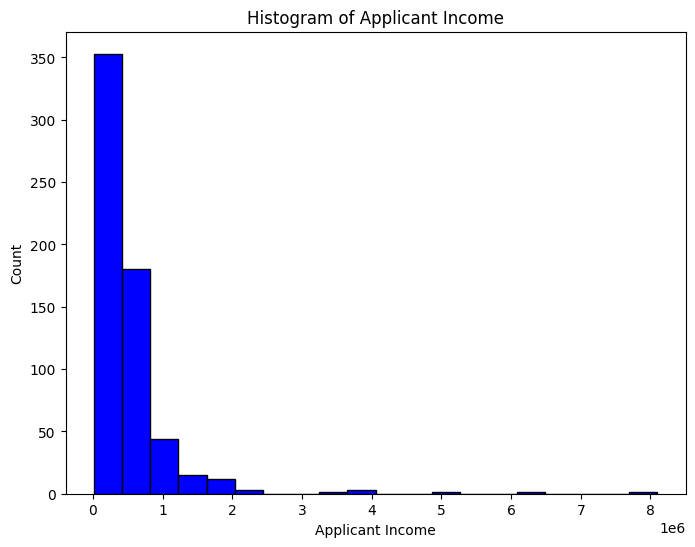

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for Applicant_Income
plt.figure(figsize=(8, 6))
plt.hist(df_encoded['Applicant_Income'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Histogram of Applicant Income')
plt.show()

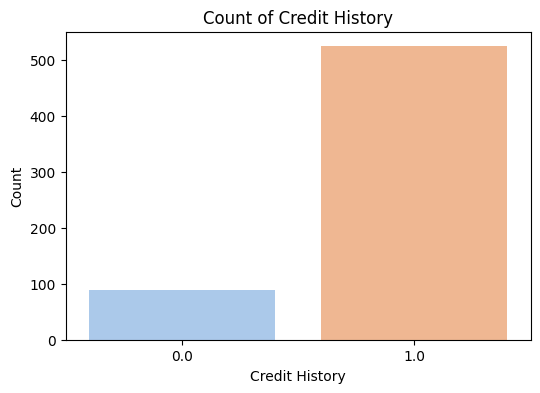

In [12]:
# 2. Bar Chart for Credit_History
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_History', data=df_encoded, palette='pastel')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Count of Credit History')
plt.show()

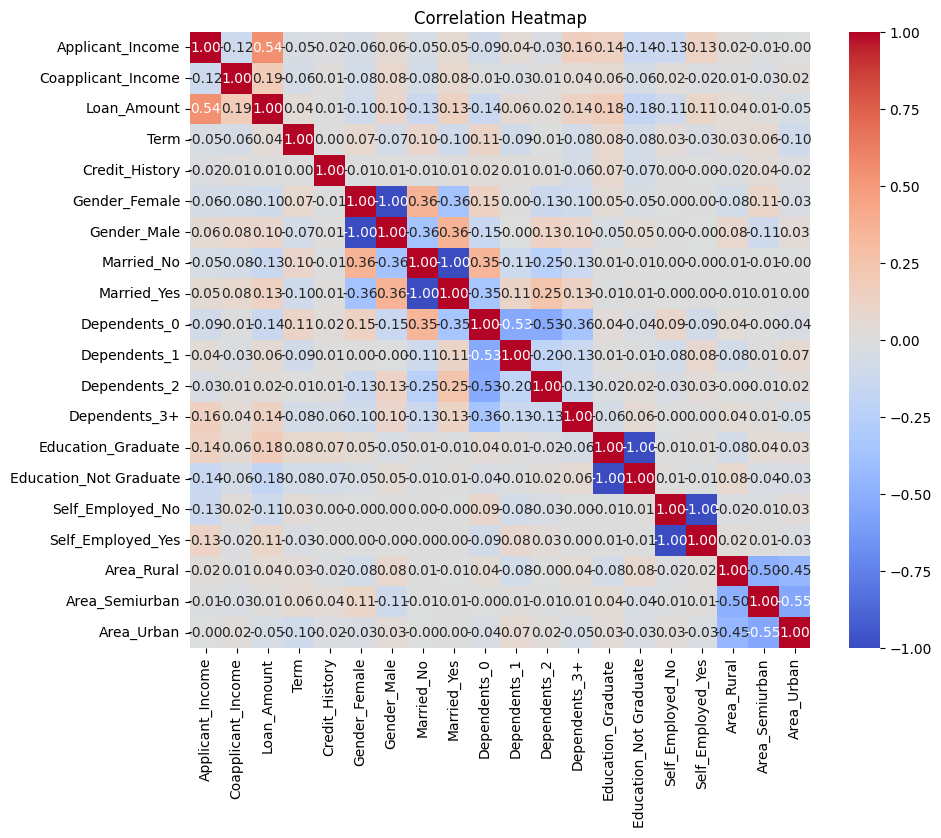

In [13]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

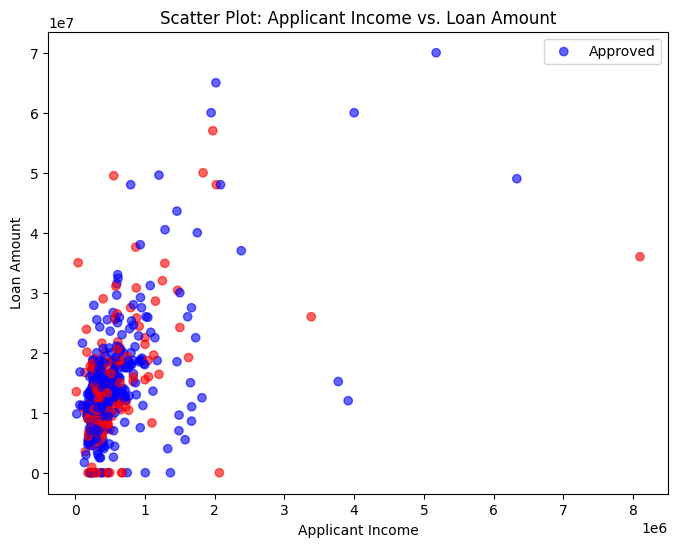

In [14]:
# 4. Scatter Plot for Applicant_Income vs. Loan_Amount
plt.figure(figsize=(8, 6))
plt.scatter(df_encoded['Applicant_Income'], df_encoded['Loan_Amount'], c=df_encoded['Status'].map({'Y': 'blue', 'N': 'red'}), alpha=0.6)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.legend(['Approved', 'Not Approved'])
plt.show()

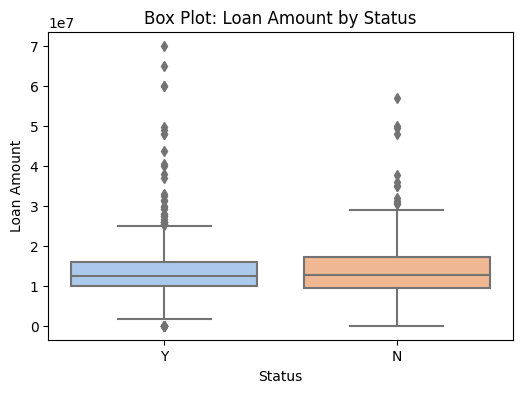

In [15]:
# 5. Box Plot for Loan_Amount by Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Status', y='Loan_Amount', data=df_encoded, palette='pastel')
plt.xlabel('Status')
plt.ylabel('Loan Amount')
plt.title('Box Plot: Loan Amount by Status')
plt.show()

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'df_encoded' contains your preprocessed and encoded DataFrame

# Split the features (X) and the target variable (y)
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

# Split the data into training, validation, and test sets (80% training, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Model Selection and Training

### Scaling feature Data for Model

In [17]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_val are your training and validation data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Scale the test data using the same scaler used for training data
X_test_scaled = scaler.transform(X_test)


###Support Vector Machine Model

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the SVM classifier with probability=True
svm_classifier = SVC(probability=True)

# Define the hyperparameter grid to search
svm_param_grid = {
    'kernel': ['linear', 'rbf'],  # Try different kernels
    'C': [0.1, 1, 10],            # Regularization parameter
    'gamma': [0.1, 1, 10]         # Kernel coefficient for 'rbf'
}

# Perform GridSearchCV for hyperparameter tuning
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best model
best_svm_model = svm_grid_search.best_estimator_
best_svm_hyperparameters = svm_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Support Vector Machine:")
print(best_svm_hyperparameters)


Best Hyperparameters for Support Vector Machine:
{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


###Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
rf_param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [None, 5, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best model
best_rf_model = rf_grid_search.best_estimator_
best_rf_hyperparameters = rf_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(best_rf_hyperparameters)



Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


###K-Nearest Neighbour Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid to search
knn_param_grid = {
    'n_neighbors': [3, 5, 7],       # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]                     # Power parameter for the Minkowski metric
}

# Perform GridSearchCV for hyperparameter tuning
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best model
best_knn_model = knn_grid_search.best_estimator_
best_knn_hyperparameters = knn_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for KNN:")
print(best_knn_hyperparameters)


Best Hyperparameters for KNN:
{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


###Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid to search
gb_param_grid = {
    'n_estimators': [50, 100, 200],     # Number of boosting stages to be run
    'learning_rate': [0.1, 0.01, 0.001],  # Step size at each boosting iteration
    'max_depth': [3, 5, 7]              # Maximum depth of individual decision trees
}

# Perform GridSearchCV for hyperparameter tuning
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=5)
gb_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best model
best_gb_model = gb_grid_search.best_estimator_
best_gb_hyperparameters = gb_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Gradient Boost:")
print(best_gb_hyperparameters)


Best Hyperparameters for Gradient Boost:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


###Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameter grid to search (not many hyperparameters for Naive Bayes)
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # The smoothing parameter for variance estimation
}

# Perform GridSearchCV for hyperparameter tuning
nb_grid_search = GridSearchCV(nb_classifier, nb_param_grid, cv=5)
nb_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best model
best_nb_model = nb_grid_search.best_estimator_
best_nb_hyperparameters = nb_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Naive Bayes:")
print(best_nb_hyperparameters)


Best Hyperparameters for Naive Bayes:
{'var_smoothing': 1e-09}


#Model Evaluation

In [40]:
#each algorithm: best_svm_model, best_rf_model, best_knn_model, best_gb_model

# Evaluate SVM performance
y_pred_svm = best_svm_model.predict(X_val_scaled)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm, pos_label='Y')
recall_svm = recall_score(y_val, y_pred_svm, pos_label='Y')
f1_svm = f1_score(y_val, y_pred_svm, pos_label='Y')

# Evaluate Random Forest performance
y_pred_rf = best_rf_model.predict(X_val_scaled)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf, pos_label='Y')
recall_rf = recall_score(y_val, y_pred_rf, pos_label='Y')
f1_rf = f1_score(y_val, y_pred_rf, pos_label='Y')

# Evaluate K-Nearest Neighbors performance
y_pred_knn = best_knn_model.predict(X_val_scaled)
accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn, pos_label='Y')
recall_knn = recall_score(y_val, y_pred_knn, pos_label='Y')
f1_knn = f1_score(y_val, y_pred_knn, pos_label='Y')

# Evaluate Gradient Boosting performance
y_pred_gb = best_gb_model.predict(X_val_scaled)
accuracy_gb = accuracy_score(y_val, y_pred_gb)
precision_gb = precision_score(y_val, y_pred_gb, pos_label='Y')
recall_gb = recall_score(y_val, y_pred_gb, pos_label='Y')
f1_gb = f1_score(y_val, y_pred_gb, pos_label='Y')



# Evaluate Naive Bayes performance
y_pred_nb = best_nb_model.predict(X_val_scaled)
accuracy_nb = accuracy_score(y_val, y_pred_nb)
precision_nb = precision_score(y_val, y_pred_nb, pos_label='Y')
recall_nb = recall_score(y_val, y_pred_nb, pos_label='Y')
f1_nb = f1_score(y_val, y_pred_nb, pos_label='Y')


###Results

In [41]:
#  DataFrame to compare model performances
evaluation_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'KNN', 'Gradient Boosting', 'Naive Bayes'],
    'Accuracy': [accuracy_svm, accuracy_rf, accuracy_knn, accuracy_gb, accuracy_nb],
    'Precision': [precision_svm, precision_rf, precision_knn, precision_gb, precision_nb],
    'Recall': [recall_svm, recall_rf, recall_knn, recall_gb, recall_nb],
    'F1 Score': [f1_svm, f1_rf, f1_knn, f1_gb, f1_nb]
})

# Display the evaluation results
print(evaluation_df)

               Model  Accuracy  Precision    Recall  F1 Score
0                SVM  0.819672   0.803922  0.976190  0.881720
1      Random Forest  0.819672   0.803922  0.976190  0.881720
2                KNN  0.803279   0.788462  0.976190  0.872340
3  Gradient Boosting  0.803279   0.788462  0.976190  0.872340
4        Naive Bayes  0.803279   0.800000  0.952381  0.869565


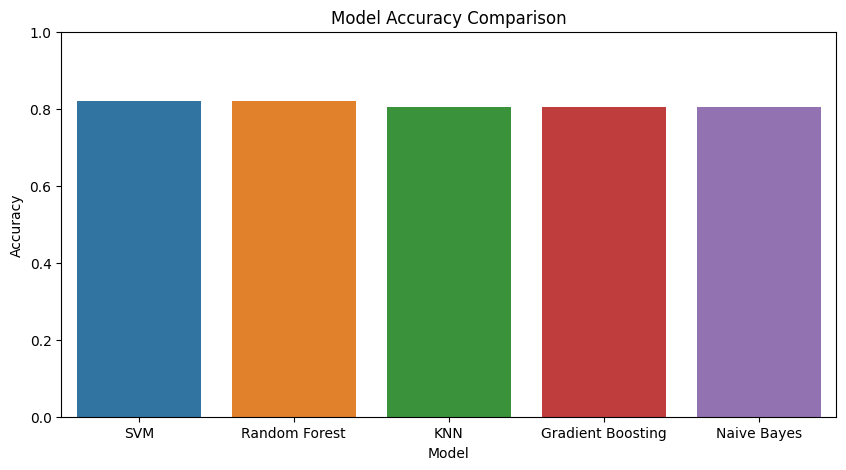

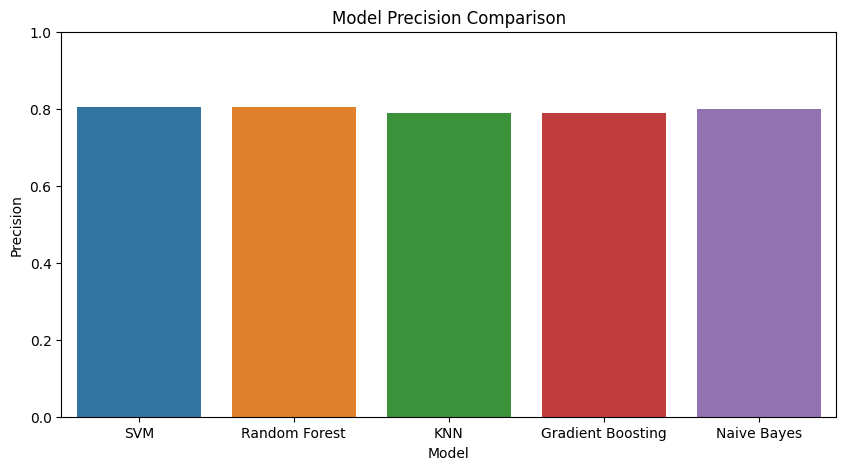

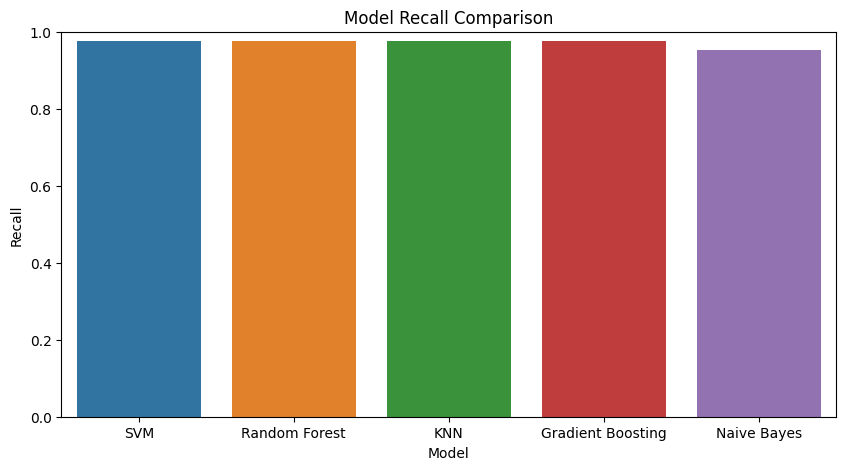

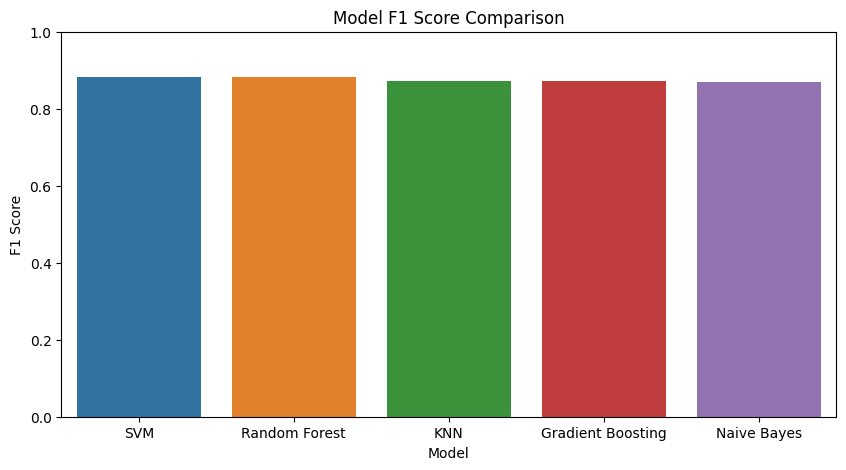

In [42]:
import seaborn as sns

# Bar plot for Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=evaluation_df)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
plt.show()

# Bar plot for Precision
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Precision', data=evaluation_df)
plt.title('Model Precision Comparison')
plt.ylim(0, 1.0)
plt.show()

# Bar plot for Recall
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Recall', data=evaluation_df)
plt.title('Model Recall Comparison')
plt.ylim(0, 1.0)
plt.show()

# Bar plot for F1 Score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='F1 Score', data=evaluation_df)
plt.title('Model F1 Score Comparison')
plt.ylim(0, 1.0)
plt.show()


## Cross-Validation

### SVM

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the SVM classifier with the best hyperparameters
best_svm_model = SVC(C=0.1, gamma=0.1, kernel='linear')

# Perform cross-validation with k=5 folds
k_folds = 5
accuracy_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
precision_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=k_folds, scoring='precision')
recall_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=k_folds, scoring='recall')
f1_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=k_folds, scoring='f1')

# Calculate the mean scores for each metric
mean_accuracy = accuracy_scores.mean()
mean_precision = precision_scores.mean()
mean_recall = recall_scores.mean()
mean_f1 = f1_scores.mean()

print("SVM Cross-Validation Results:")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)


SVM Cross-Validation Results:
Mean Accuracy: 0.8145949288806431
Mean Precision: nan
Mean Recall: nan
Mean F1 Score: nan


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier with the best hyperparameters
best_rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50)

# Perform cross-validation with k=5 folds
k_folds = 5
accuracy_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
precision_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=k_folds, scoring='precision')
recall_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=k_folds, scoring='recall')
f1_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=k_folds, scoring='f1')

# Calculate the mean scores for each metric
mean_accuracy = accuracy_scores.mean()
mean_precision = precision_scores.mean()
mean_recall = recall_scores.mean()
mean_f1 = f1_scores.mean()

print("Random Forest Cross-Validation Results:")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)


Random Forest Cross-Validation Results:
Mean Accuracy: 0.8084518655947226
Mean Precision: nan
Mean Recall: nan
Mean F1 Score: nan


###KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize the KNN classifier with the best hyperparameters
best_knn_model = KNeighborsClassifier(n_neighbors=7, p=2, weights='distance')

# Perform cross-validation with k=5 folds
k_folds = 5
accuracy_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
precision_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=k_folds, scoring='precision')
recall_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=k_folds, scoring='recall')
f1_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=k_folds, scoring='f1')

# Calculate the mean scores for each metric
mean_accuracy = accuracy_scores.mean()
mean_precision = precision_scores.mean()
mean_recall = recall_scores.mean()
mean_f1 = f1_scores.mean()

print("KNN Cross-Validation Results:")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)


KNN Cross-Validation Results:
Mean Accuracy: 0.7534941249226963
Mean Precision: nan
Mean Recall: nan
Mean F1 Score: nan


###Gradient Boost

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Gradient Boosting classifier with the best hyperparameters
best_gb_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=50)

# Perform cross-validation with k=5 folds
k_folds = 5
accuracy_scores = cross_val_score(best_gb_model, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
precision_scores = cross_val_score(best_gb_model, X_train_scaled, y_train, cv=k_folds, scoring='precision')
recall_scores = cross_val_score(best_gb_model, X_train_scaled, y_train, cv=k_folds, scoring='recall')
f1_scores = cross_val_score(best_gb_model, X_train_scaled, y_train, cv=k_folds, scoring='f1')

# Calculate the mean scores for each metric
mean_accuracy = accuracy_scores.mean()
mean_precision = precision_scores.mean()
mean_recall = recall_scores.mean()
mean_f1 = f1_scores.mean()

print("Gradient Boosting Cross-Validation Results:")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)


Gradient Boosting Cross-Validation Results:
Mean Accuracy: 0.8084930942073798
Mean Precision: nan
Mean Recall: nan
Mean F1 Score: nan


###Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation with k=5 folds
k_folds = 5
accuracy_scores = cross_val_score(nb_classifier, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
precision_scores = cross_val_score(nb_classifier, X_train_scaled, y_train, cv=k_folds, scoring='precision')
recall_scores = cross_val_score(nb_classifier, X_train_scaled, y_train, cv=k_folds, scoring='recall')
f1_scores = cross_val_score(nb_classifier, X_train_scaled, y_train, cv=k_folds, scoring='f1')

# Calculate the mean scores for each metric
mean_accuracy = accuracy_scores.mean()
mean_precision = precision_scores.mean()
mean_recall = recall_scores.mean()
mean_f1 = f1_scores.mean()

print("Naive Bayes Cross-Validation Results:")
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)


Naive Bayes Cross-Validation Results:
Mean Accuracy: 0.7901257472686044
Mean Precision: nan
Mean Recall: nan
Mean F1 Score: nan


#Test set Evaluation

Classification Report - SVM Model:
              precision    recall  f1-score   support

           N       1.00      0.38      0.55        24
           Y       0.72      1.00      0.84        38

    accuracy                           0.76        62
   macro avg       0.86      0.69      0.69        62
weighted avg       0.83      0.76      0.72        62



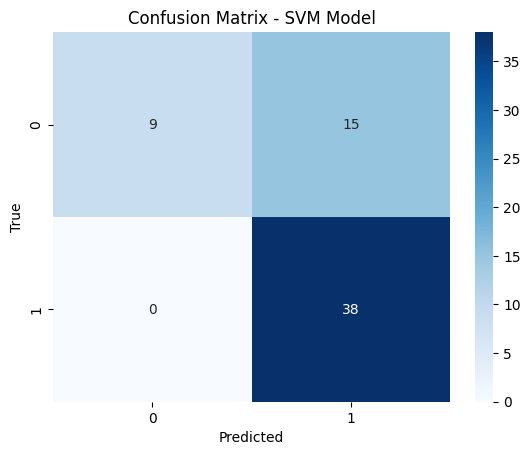

In [53]:
# Evaluate SVM performance on the test set
y_pred_svm_test = best_svm_model.predict(X_test_scaled)

# Generate a classification report
print("Classification Report - SVM Model:")
print(classification_report(y_test, y_pred_svm_test, target_names=['N', 'Y']))

# Create a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_test)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




1.   Precision: The precision for class 'N' (No) is 1.00, meaning that when the model predicts a loan as 'N', it is correct 100% of the time. However, the precision for class 'Y' (Yes) is 0.72, indicating that when the model predicts a loan as 'Y', it is correct 72% of the time.
2.   Recall: The recall for class 'N' is 0.38, indicating that the model correctly identifies only 38% of the actual 'N' loans. However, the recall for class 'Y' is 1.00, meaning that the model correctly identifies all the actual 'Y' loans.
3. F1-Score: The F1-score is a balanced metric that considers both precision and recall. The F1-score for class 'N' is 0.55, and for class 'Y' is 0.84.
4. Support: The support is the number of samples in each class in the test set. There are 24 samples for class 'N' and 38 samples for class 'Y'.
5. Accuracy: The overall accuracy of the model on the test set is 0.76, meaning that the model correctly predicts the loan status for 76% of the samples in the test set.
6. Macro Avg: The macro-average takes the average of precision, recall, and F1-score for both classes, treating each class equally. The macro-average precision is 0.86, recall is 0.69, and F1-score is 0.69.
7. Weighted Avg: The weighted average considers the support (number of samples) for each class and calculates a weighted average of precision, recall, and F1-score. The weighted average precision is 0.83, recall is 0.76, and F1-score is 0.72.

